In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path1 = 'takehome_user_engagement.csv'
path2 = 'takehome_users.csv'

usage_df = pd.read_csv(path1)
user_df = pd.read_csv(path2, encoding='latin1')

## Data on User Engagement

In [3]:
# has a row for each day that a user logged into the product
usage_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [4]:
usage_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [5]:
# there is no need for the visited column
usage_df['visited'].value_counts()

visited
1    207917
Name: count, dtype: int64

In [6]:
# we will drop the column
usage_df.drop(columns='visited', inplace=True)

In [7]:
# find duplicated rows
usage_df[usage_df.duplicated(keep=False)]

,time_stamp,user_id


In [8]:
# check na values
usage_df.isna().sum()

time_stamp    0
user_id       0
dtype: int64

In [9]:
# turn time_stamp into datetime type
usage_df['time_stamp'] = pd.to_datetime(usage_df['time_stamp'])

In [10]:
# Grouping by time frequecy of 7 days 
groups = usage_df.groupby(pd.Grouper(key='time_stamp', freq='7D'))

# Initialize an empty list to store the DataFrames for each 7-day period
period_dfs = []

# Iterate over the groups and extract the corresponding DataFrames
for period, group_df in groups:
    # Count the number of logins for each user in the current period
    login_counts = group_df.groupby('user_id').size()
    # Filter the users who logged in 3 or more times
    users_with_3_or_more_logins = login_counts[login_counts >= 3].index
    # Filter the original DataFrame to include only these users for the current period
    filtered_df = group_df[group_df['user_id'].isin(users_with_3_or_more_logins)]
    # Append the filtered DataFrame to the list
    period_dfs.append(filtered_df)
# Concatenate the DataFrames into a single DataFrame
resample_df = pd.concat(period_dfs)
resample_df

,time_stamp,user_id
11973,2012-06-15 16:04:36,728
11974,2012-06-16 16:04:36,728
11975,2012-06-17 16:04:36,728
110496,2012-06-21 02:05:25,6171
26827,2012-06-21 21:58:33,1693
...,...,...
98415,2014-06-04 23:28:26,5378
137644,2014-06-04 23:30:50,7859
162633,2014-06-04 23:34:04,9325
168409,2014-06-04 23:46:31,9558


In [11]:
# Creating a new data frame of non-adopted users
# Resample the DataFrame into 7-day periods and obtain the groups
groups = usage_df.groupby(pd.Grouper(key='time_stamp', freq='7D'))

# Initialize an empty list to store the DataFrames for each 7-day period
period_dfs = []

# Iterate over the groups and extract the corresponding DataFrames
for period, group_df in groups:
    # Count the number of logins for each user in the current period
    login_counts = group_df.groupby('user_id').size()
    # Filter the users who logged in less than 3 times
    non_adopted_users = login_counts[login_counts < 3].index
    # Filter the original DataFrame to include only these users for the current period
    filtered_df = group_df[group_df['user_id'].isin(non_adopted_users)]
    # Append the filtered DataFrame to the list
    period_dfs.append(filtered_df)

# Concatenate the DataFrames into a single DataFrame
resample_not_adopted = pd.concat(period_dfs)
print(resample_not_adopted.shape)

(46493, 2)


In [12]:
# Filter the original DataFrame to exclude adopted users
resample_not_adopted = resample_not_adopted[~resample_not_adopted['user_id'].isin(resample_df['user_id'].unique())]
print(resample_not_adopted.shape)

(11520, 2)


## Data on Users Who Signed Up

In [13]:
# data on 12,000 users who signed up for the product in the last two years
user_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [14]:
# find duplicated rows
user_df[user_df.duplicated(keep=False)]

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id


In [15]:
# check na values
user_df.isna().sum()

object_id                        0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id            5583
dtype: int64

In [16]:
# we will drop those with missing values
user_df.drop(columns=['last_session_creation_time','invited_by_user_id'], inplace=True)

In [17]:
# rename columns for merging later on
user_df.rename(columns={'object_id':'user_id'}, inplace=True)

In [18]:
# check na values
user_df.isna().sum()

user_id                       0
creation_time                 0
name                          0
email                         0
creation_source               0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
dtype: int64

In [19]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   user_id                     12000 non-null  int64 
 1   creation_time               12000 non-null  object
 2   name                        12000 non-null  object
 3   email                       12000 non-null  object
 4   creation_source             12000 non-null  object
 5   opted_in_to_mailing_list    12000 non-null  int64 
 6   enabled_for_marketing_drip  12000 non-null  int64 
 7   org_id                      12000 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 750.1+ KB


In [20]:
# convert creation_time to datime type
user_df['creation_time'] = pd.to_datetime(user_df['creation_time'])

## Merging Data Frames

In [21]:
# Inner join the resample_not_adopted with user_df
not_adopted = resample_not_adopted.merge(user_df,how='inner', on='user_id')
not_adopted.shape

(11520, 9)

In [22]:
# Inner join the resample_df with user_df
new_df = resample_df.merge(user_df,how='inner', on='user_id')
new_df.shape

(161424, 9)

The shape above indicate that we not missed any data points with the inner join between `user_df`, both `resample_df` and `new_df` have the same number or rows.
Same for `resample_not_adopted` and `not_adopted`

In [23]:
new_df.columns

Index(['time_stamp', 'user_id', 'creation_time', 'name', 'email',
       'creation_source', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id'],
      dtype='object')

In [24]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161424 entries, 0 to 161423
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   time_stamp                  161424 non-null  datetime64[ns]
 1   user_id                     161424 non-null  int64         
 2   creation_time               161424 non-null  datetime64[ns]
 3   name                        161424 non-null  object        
 4   email                       161424 non-null  object        
 5   creation_source             161424 non-null  object        
 6   opted_in_to_mailing_list    161424 non-null  int64         
 7   enabled_for_marketing_drip  161424 non-null  int64         
 8   org_id                      161424 non-null  int64         
dtypes: datetime64[ns](2), int64(4), object(3)
memory usage: 11.1+ MB


In [25]:
new_df['time_stamp'].dt.year

0         2012
1         2012
2         2012
3         2012
4         2012
          ... 
161419    2014
161420    2014
161421    2014
161422    2014
161423    2014
Name: time_stamp, Length: 161424, dtype: int32

In [26]:
# Group the DataFrame by month and year
grouped = new_df.groupby([new_df['time_stamp'].dt.month, new_df['time_stamp'].dt.year])

# Define the number of samples you want from each group
num_samples_per_group = 500

# Sample a fixed number of rows from each group
downsampled_df = grouped.apply(lambda x: x.sample(num_samples_per_group) if len(x) > num_samples_per_group else x)

# Reset index to avoid duplicate column labels
downsampled_df = downsampled_df.reset_index(drop=True)
print(downsampled_df.shape)

(11440, 9)


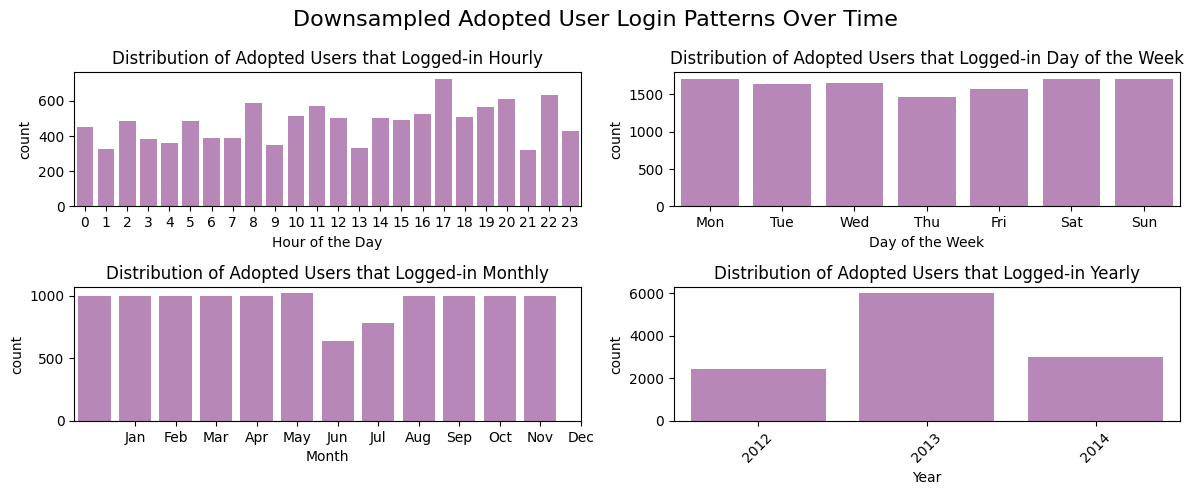

In [27]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 5))

# Plot distribution of adopted users hourly
sns.countplot(data=downsampled_df, x=downsampled_df['time_stamp'].dt.hour, color='purple',alpha=0.5 , ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Adopted Users that Logged-in Hourly')
axes[0, 0].set_xlabel('Hour of the Day')

# Plot distribution of adopted users by day of the week
sns.countplot(data=downsampled_df, x=downsampled_df['time_stamp'].dt.day_of_week, color='purple',alpha=0.5 , ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Adopted Users that Logged-in Day of the Week')
axes[0, 1].set_xlabel('Day of the Week')
axes[0, 1].set_xticks(range(7))
axes[0, 1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])  # Set meaningful x-labels

# Plot distribution of adopted users by month
sns.countplot(data=downsampled_df, x=downsampled_df['time_stamp'].dt.month, color='purple',alpha=0.5 , ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Adopted Users that Logged-in Monthly')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_xticks(range(1, 13))
axes[1, 0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Set meaningful x-labels

# Plot distribution of adopted users by year
sns.countplot(data=downsampled_df, x=downsampled_df['time_stamp'].dt.year, color='purple',alpha=0.5 , ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Adopted Users that Logged-in Yearly')
axes[1, 1].set_xlabel('Year')
axes[1, 1].tick_params(axis='x', rotation=45)  # Rotate x-labels for better readability

# Set main title for the entire figure
fig.suptitle('Downsampled Adopted User Login Patterns Over Time', fontsize=16)

plt.tight_layout()
plt.show()

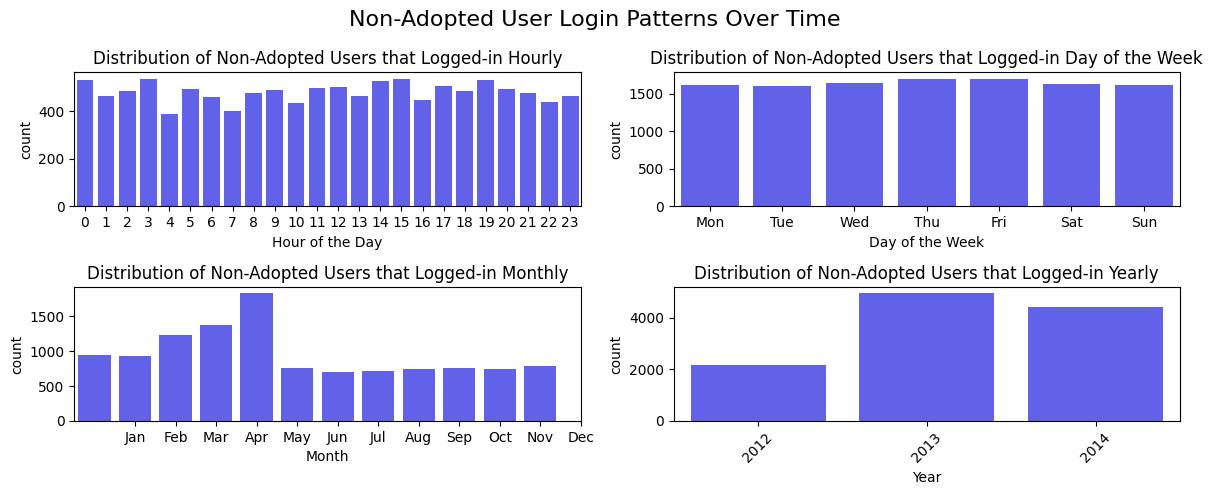

In [28]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 5))

# Plot distribution of adopted users hourly
sns.countplot(data=not_adopted, x=not_adopted['time_stamp'].dt.hour, color='blue',alpha=0.7 , ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Non-Adopted Users that Logged-in Hourly')
axes[0, 0].set_xlabel('Hour of the Day')

# Plot distribution of adopted users by day of the week
sns.countplot(data=not_adopted, x=not_adopted['time_stamp'].dt.day_of_week, color='blue',alpha=0.7 , ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Non-Adopted Users that Logged-in Day of the Week')
axes[0, 1].set_xlabel('Day of the Week')
axes[0, 1].set_xticks(range(7))
axes[0, 1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])  # Set meaningful x-labels

# Plot distribution of adopted users by month
sns.countplot(data=not_adopted, x=not_adopted['time_stamp'].dt.month, color='blue',alpha=0.7 , ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Non-Adopted Users that Logged-in Monthly')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_xticks(range(1, 13))
axes[1, 0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Set meaningful x-labels

# Plot distribution of adopted users by year
sns.countplot(data=not_adopted, x=not_adopted['time_stamp'].dt.year, color='blue',alpha=0.7 , ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Non-Adopted Users that Logged-in Yearly')
axes[1, 1].set_xlabel('Year')
axes[1, 1].tick_params(axis='x', rotation=45)  # Rotate x-labels for better readability

# Set main title for the entire figure
fig.suptitle('Non-Adopted User Login Patterns Over Time', fontsize=16)

plt.tight_layout()
plt.show()

In [29]:
# Remove duplicate user entries
print('Before duplicated users have been removed:')
print(new_df.shape)
print(not_adopted.shape)
print('-'*20)
new_df = new_df.drop_duplicates(subset='user_id')
not_adopted = not_adopted.drop_duplicates(subset='user_id',keep='first')
print('After duplicated users have been removed:')
print(new_df.shape)
print(not_adopted.shape)


Before duplicated users have been removed:
(161424, 9)
(11520, 9)
--------------------
After duplicated users have been removed:
(1445, 9)
(7378, 9)


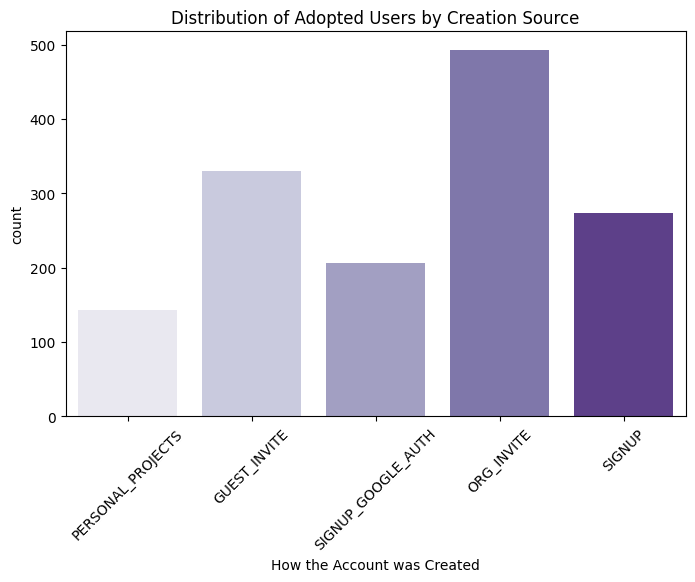

In [30]:
# Adopted Creation_Source
plt.figure(figsize=(8, 5))
sns.countplot(data=new_df, x='creation_source', hue='creation_source', palette='Purples')
plt.title('Distribution of Adopted Users by Creation Source')
plt.xticks(rotation=45)
plt.xlabel('How the Account was Created')
plt.show()

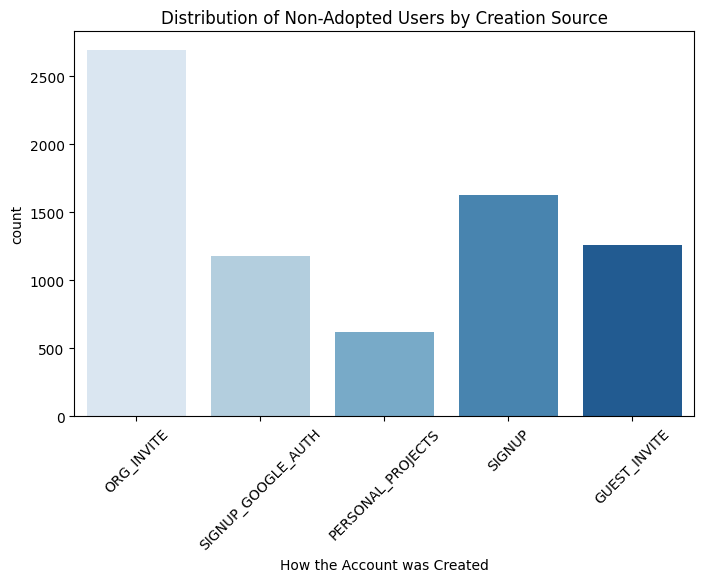

In [31]:
# Not Adopted Creation_Source
plt.figure(figsize=(8, 5))
sns.countplot(data=not_adopted, x='creation_source', hue='creation_source', palette='Blues')
plt.title('Distribution of Non-Adopted Users by Creation Source')
plt.xticks(rotation=45)
plt.xlabel('How the Account was Created')
plt.show()

In [34]:
new_df.columns

Index(['time_stamp', 'user_id', 'creation_time', 'name', 'email',
       'creation_source', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id'],
      dtype='object')

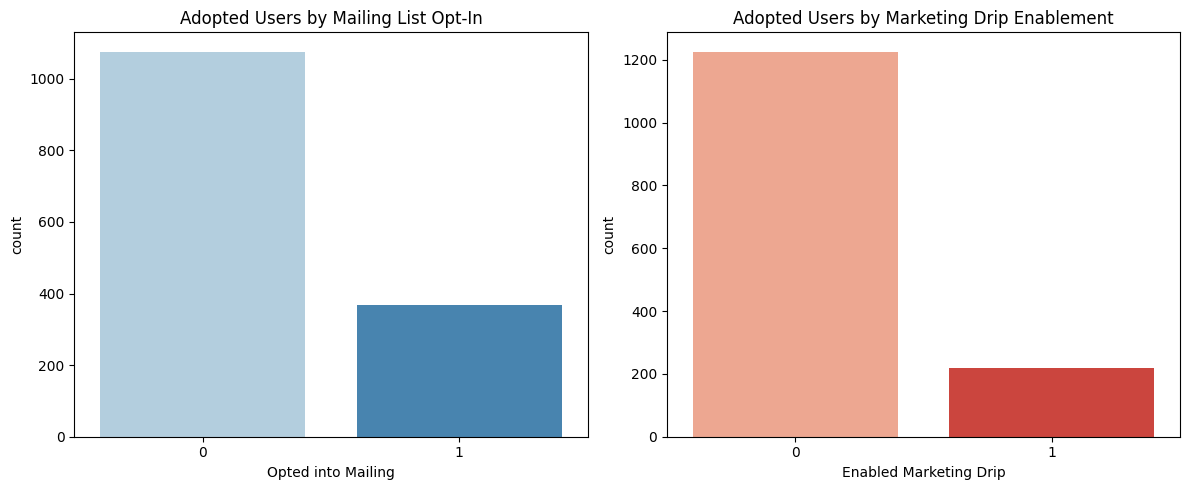

In [32]:
# Opted_in_to_mailing_list, Enabled_for_marketing_drip
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(data=new_df, x='opted_in_to_mailing_list', hue='opted_in_to_mailing_list', palette='Blues', ax=axes[0], legend=False)
axes[0].set_xlabel('Opted into Mailing')
axes[0].set_title('Adopted Users by Mailing List Opt-In')
sns.countplot(data=new_df, x='enabled_for_marketing_drip', hue='enabled_for_marketing_drip', palette='Reds', ax=axes[1], legend=False)
axes[1].set_title('Adopted Users by Marketing Drip Enablement')
axes[1].set_xlabel('Enabled Marketing Drip')
plt.tight_layout()
plt.show()


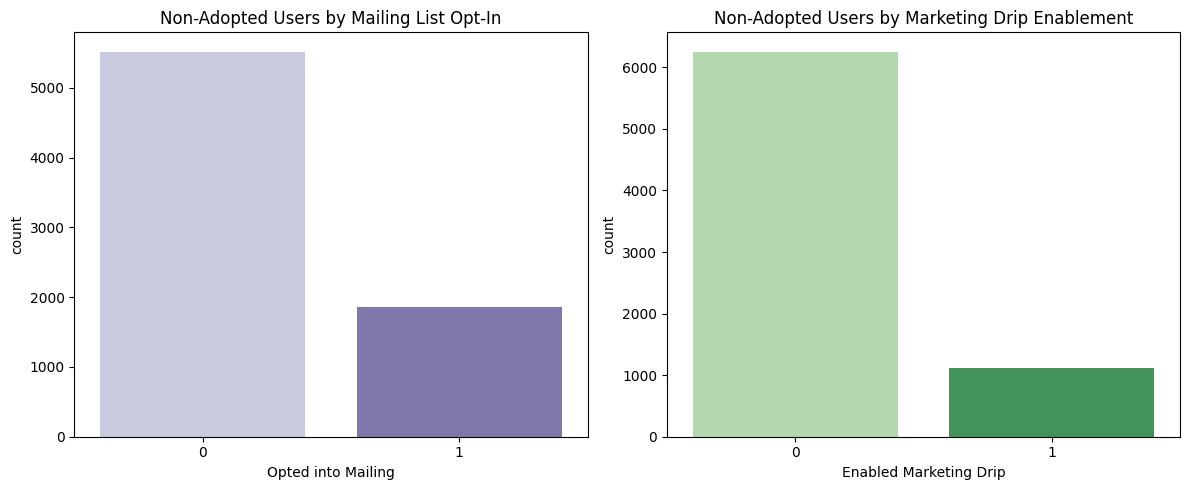

In [33]:
# Opted_in_to_mailing_list, Enabled_for_marketing_drip
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(data=not_adopted, x='opted_in_to_mailing_list', hue='opted_in_to_mailing_list', palette='Purples', ax=axes[0], legend=False)
axes[0].set_xlabel('Opted into Mailing')
axes[0].set_title('Non-Adopted Users by Mailing List Opt-In')
sns.countplot(data=not_adopted, x='enabled_for_marketing_drip', hue='enabled_for_marketing_drip', palette='Greens', ax=axes[1], legend=False)
axes[1].set_title('Non-Adopted Users by Marketing Drip Enablement')
axes[1].set_xlabel('Enabled Marketing Drip')
plt.tight_layout()
plt.show()


## Notes and Conclusion

Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven­day period, **identify which factors predict future user adoption.**

Action Notes:
1. Convert the `time_stamp` column to datetime format.
2. Create a DataFrame of adopted users by examining seven-day periods and counting instances where there are three or more timestamps within that period.
3. Inner join this filtered data frame to inner join with the user sign up data frame

Potential factors influencing future user adoption:
- Do comparison of those who are adopted users and those who are not.
- Opt-in status for the mailing list.
- Participation in the marketing drip campaign.
- Account creation source, which may provide insights into user engagement patterns.

Considerations:

1. The 'visited' column in the usage data (`usage_df`) serves the sole purpose of timestamping user access to the product, rendering it redundant. Therefore, we opt to exclude it from our analysis.

2. Missing values are present in the `last_session_creation_time` and `invited_by_user_id` columns. Due to their user-specific nature and the lack of accurate imputation methods, we choose to disregard these details for our predictive objectives. Our primary focus lies in forecasting future user adoption, rendering granular user details unnecessary and the task of imputation laborious and redundant.

3. For the join between `resample_df` and `user_df`, we employ an inner join. This decision is made because `usage_df` has been filtered to exclusively include **adopted** users. Therefore, we desire only the data from `user_df` corresponding to adopted users, eliminating any missing data concerns.

4. Creating a distinct data frame for `not-adopted` users necessitates identifying users who have never been classified as 'adopted.' This involves excluding users who have logged in more than three times at any point, automatically categorizing them as 'adopted.' Consequently, such users are excluded from the `not_adopted` data frame to ensure focused analysis on non-adopted users.

5. Due to the substantial number of rows in `new_df`, downsampling is essential, specifically for plotting timestamps. We aim to match the sample size of `new_df` to that of `not_adopted` while grouping by month and year to ensure an equitable distribution of timestamps across periods.

6. Following the plotting of hour, day, month, and year from both `new_df` and `not_adopted`, duplicate rows for each user are removed. This step is crucial to prevent the plotting of duplicate creation sources for the same user, given that users are duplicated in the resultant data frames due to their timestamps.

Analysis Conclusion:

Upon examining the data, several key insights emerge:

1. **User Activity Patterns**:
   - Before removing duplicate entries, the dataset contained 161,424 rows for adopted users and 11,520 rows for non-adopted users. After removing duplicates based on user ID, the counts decreased to 1,445 rows for adopted users and 7,378 rows for non-adopted users.
   - Both adopted and non-adopted users showed consistent activity patterns, particularly in the year 2013. However, non-adopted users displayed similar levels of activity in 2014, unlike adopted users. Non-adopted users peaked in activity during April but experienced a significant decrease in the following months. Overall, adopted users had a higher number of logins.

2. **Creation Source Distribution**:
   - After removing duplicates, both adopted and non-adopted users were primarily sourced from invitations by organizations. However, non-adopted users also frequently signed up independently, whereas adopted users were predominantly invited by other users.

3. **Recommendations for Increasing Adoption**:
   - Encouraging current users to invite others to the platform could be an effective strategy for increasing adoption. Incentivizing users with rewards or points for successful referrals may motivate them to invite friends.
   - While organization invitations play a significant role in account creation, encouraging friend invitations or promoting platform usage with friends could enhance user engagement among non-adopted users.
   - Opting into the mailing list and enabling the marketing drip did not significantly impact user adoption in either group. Most users in both categories did not opt for these features, suggesting alternative methods may be more effective in increasing adoption rates.